In [108]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from webdriver_manager.firefox import GeckoDriverManager
import time

import re
import urllib
from urllib.parse import urlparse

import requests

In [109]:
s = Service(executable_path = "C:\\Users\\xemyc\\Other\\data_journalism\\geckodriver.exe")
driver = webdriver.Firefox(service = s)

### 1. Extract the latest 100 articles containing the keyword "Pelosi" from China Daily

In [10]:
china_daily_site = urllib.request.urlopen("https://www.chinadaily.com.cn/")
soup = BeautifulSoup(china_daily_site)

china_daily_search_site = []
all_links_tags = soup.findAll('a')

for i in all_links_tags:
    if "search" in i.get('href'):
        #print(i.get('href'))
        china_daily_search_site.append(i.get('href'))
        
print(china_daily_search_site)

['//newssearch.chinadaily.com.cn/en/search']


In [11]:
keyword  =  "Pelosi"
pelosi_articles = []
pelosi_articles_time = []
pelosi_articles_link = []

for url in china_daily_search_site:
    u = urlparse(url)
    new_u = u._replace(scheme = 'http')
    new_u = new_u._replace(query = "query=" + keyword)
    
    #print(new_u.geturl())
    new_url = new_u.geturl()
    driver.delete_all_cookies()
    driver.get(new_url)
    
    #looks for the search bar, clears whatever word was in the search bar, and enters "Pelosi"
    search = driver.find_element("id", 'query')
    search.clear()
    search.send_keys(keyword)
    time.sleep(5)
    
    
    #this goes through pages 1 - 11, but stops at 10; there are 10 articles on each page
    i = 1
    while i <= 10:
        
        for number in range(1):
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
            #prints the article title
            for article in soup.select(".art_detail > span > h4"):
                #print(article.text)
                pelosi_articles.append(article.text)
                
            for author_time in soup.select(".art_detail > span > h4 + b"):
                #print(author_time.text)
                pelosi_articles_time.append(author_time.text)
                
            for link in soup.select(".art_detail > span > h4 > a"):
                pelosi_articles_link.append(link.get('href'))
        
        elem = driver.find_element(By.CSS_SELECTOR, '[onclick="$SearchController.pagging(' + str(i) + ')"]')
        elem.click()
        
        time.sleep(3)
        i = i + 1
    

In [12]:
#100 articles with the keyword pelosi
print("Number of articles: " + str(len(pelosi_articles)) + "\n")

for articles in pelosi_articles:
    print(articles)

Number of articles: 100

Biden's China policy is contradictory
Pelosi's visit to Taiwan hastens its reunification with mainland
Pelosi trip stirs strong opposition in Russia
Anger in Canada over Taiwan provocations
Chinese Ambassador to the US Qin Gang takes an exclusive interview with Al Jazeera English Channel's 'The Bottom Line'
It is US that is the gorilla in the room
Taiwan question seen as key to China-Japan ties
Ambassador Qin Gang's interview with US mainstream media
Chinese ambassador calls on US, UK to handle ties with China by showing respect
CHIPS and Science Act won't solve US' problems
FM lauds Putin for remarks on Pelosi trip
Relying on US to seek 'Taiwan independence' a dead end
Pelosi visit pushes Washington into a quagmire
US 'chip alliance' can't contain China
China's national reunification is an unstoppable process
Washington's shamelessness knows no bounds
Taiwan is now a touchstone issue for the UK, the US and for us in China. This is how we see it
Taiwan secessio

In [13]:
#articles' author and time
print("Number of articles: " + str(len(pelosi_articles_time)) + "\n")

for time in pelosi_articles_time:
    print(time)

Number of articles: 100

By Fan Jishe  (chinadaily.com.cn) 2022-08-19 12:15
  (HK EDITION) 2022-08-19 10:27
By REN QI in Moscow  (China Daily Global) 2022-08-19 10:25
By RENA LI in Toronto  (CHINA DAILY) 2022-08-19 07:58
  (us.china-embassy.gov.cn) 2022-08-19 07:41
  (PEOPLE'S DAILY) 2022-08-19 07:08
By ZHANG YUNBI  (China Daily) 2022-08-19 00:00
  (us.china-embassy.gov.cn) 2022-08-18 14:45
  (Xinhua) 2022-08-18 13:56
By Zhang Zhouxiang  (chinadaily.com.cn) 2022-08-18 10:28
By WANG QINGYUN  (China Daily) 2022-08-18 09:22
  (Xinhua) 2022-08-18 08:24
By Francisco Leandro  (China Daily) 2022-08-18 07:32
By Angelo Giuliano  (China Daily) 2022-08-18 07:24
By Tu Haiming  (HK EDITION) 2022-08-18 06:41
  (CHINA DAILY) 2022-08-18 00:00
By Zheng Zeguang  (China Daily Global) 2022-08-18 00:00
  (CHINA DAILY) 2022-08-18 00:00
By ZHAO HUANXIN in Washington and MO JINGXI in Beijing  (CHINA DAILY) 2022-08-18 00:00
  (Xinhua) 2022-08-17 22:34
  (chinadaily.com.cn) 2022-08-17 19:31
  (chinadaily.com.cn

In [14]:
#articles' link
print("Number of articles: " + str(len(pelosi_articles_link)) + "\n")

for link in pelosi_articles_link:
    print(link)

Number of articles: 100

https://www.chinadaily.com.cn/a/202208/19/WS62ff0e82a310fd2b29e73378.html
https://epaper.chinadaily.com.cn/a/202208/19/WS62fef53ba3109375516ee8c6.html
https://global.chinadaily.com.cn/a/202208/19/WS62fef4a0a310fd2b29e732e9.html
https://www.chinadaily.com.cn/a/202208/19/WS62fed223a310fd2b29e73192.html
https://www.chinadaily.com.cn/a/202208/19/WS62fece43a310fd2b29e73161.html
https://global.chinadaily.com.cn/a/202208/19/WS62fec681a310fd2b29e73124.html
https://epaper.chinadaily.com.cn/a/202208/19/WS62fee0b1a3109375516ee85b.html
https://www.chinadaily.com.cn/a/202208/18/WS62fde006a310fd2b29e72ff3.html
https://global.chinadaily.com.cn/a/202208/18/WS62fdd4ada310fd2b29e72fc2.html
https://global.chinadaily.com.cn/a/202208/18/WS62fda3dfa310fd2b29e72eff.html
https://global.chinadaily.com.cn/a/202208/18/WS62fd9467a310fd2b29e72de9.html
https://global.chinadaily.com.cn/a/202208/18/WS62fd86d8a310fd2b29e72d48.html
https://global.chinadaily.com.cn/a/202208/18/WS62fd7a95a310fd2b

### 2. Analyze the time articles and make a visualization of them

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
import seaborn as sns

In [214]:
china_df = pd.DataFrame({"Articles": pelosi_articles, "Author + Datetime": pelosi_articles_time, "Article Link": pelosi_articles_link})
china_df.head()

,Articles,Author + Datetime,Article Link
0,Biden's China policy is contradictory,By Fan Jishe (chinadaily.com.cn) 2022-08-19 1...,https://www.chinadaily.com.cn/a/202208/19/WS62...
1,Pelosi's visit to Taiwan hastens its reunifica...,(HK EDITION) 2022-08-19 10:27,https://epaper.chinadaily.com.cn/a/202208/19/W...
2,Pelosi trip stirs strong opposition in Russia,By REN QI in Moscow (China Daily Global) 2022...,https://global.chinadaily.com.cn/a/202208/19/W...
3,Anger in Canada over Taiwan provocations,By RENA LI in Toronto (CHINA DAILY) 2022-08-1...,https://www.chinadaily.com.cn/a/202208/19/WS62...
4,Chinese Ambassador to the US Qin Gang takes an...,(us.china-embassy.gov.cn) 2022-08-19 07:41,https://www.chinadaily.com.cn/a/202208/19/WS62...


In [215]:
china_df['Author + Datetime'] = china_df['Author + Datetime'].str.split(r'\([^)]*\)')
china_df['Author'] = china_df['Author + Datetime'].str.get(0)
china_df['Datetime'] = china_df['Author + Datetime'].str.get(1)

In [216]:
china_df['Author'] = china_df['Author'].str.replace(r'By', '', regex = True)
china_df['Author'] = china_df['Author'].str.title()

In [217]:
china_df.drop("Author + Datetime", inplace = True, axis = 1)
china_df.head()

,Articles,Article Link,Author,Datetime
0,Biden's China policy is contradictory,https://www.chinadaily.com.cn/a/202208/19/WS62...,Fan Jishe,2022-08-19 12:15
1,Pelosi's visit to Taiwan hastens its reunifica...,https://epaper.chinadaily.com.cn/a/202208/19/W...,,2022-08-19 10:27
2,Pelosi trip stirs strong opposition in Russia,https://global.chinadaily.com.cn/a/202208/19/W...,Ren Qi In Moscow,2022-08-19 10:25
3,Anger in Canada over Taiwan provocations,https://www.chinadaily.com.cn/a/202208/19/WS62...,Rena Li In Toronto,2022-08-19 07:58
4,Chinese Ambassador to the US Qin Gang takes an...,https://www.chinadaily.com.cn/a/202208/19/WS62...,,2022-08-19 07:41


In [218]:
china_df['Date'] = china_df.Datetime.str[:11]
china_df['Time'] = china_df.Datetime.str[12:]

In [219]:
china_df.drop("Datetime", inplace = True, axis = 1)
china_df['Author'] = china_df['Author'].str.replace(r'\sIn\s.*', '', regex = True)
china_df.head()

,Articles,Article Link,Author,Date,Time
0,Biden's China policy is contradictory,https://www.chinadaily.com.cn/a/202208/19/WS62...,Fan Jishe,2022-08-19,12:15
1,Pelosi's visit to Taiwan hastens its reunifica...,https://epaper.chinadaily.com.cn/a/202208/19/W...,,2022-08-19,10:27
2,Pelosi trip stirs strong opposition in Russia,https://global.chinadaily.com.cn/a/202208/19/W...,Ren Qi,2022-08-19,10:25
3,Anger in Canada over Taiwan provocations,https://www.chinadaily.com.cn/a/202208/19/WS62...,Rena Li,2022-08-19,07:58
4,Chinese Ambassador to the US Qin Gang takes an...,https://www.chinadaily.com.cn/a/202208/19/WS62...,,2022-08-19,07:41


In [220]:
china_df['Date_Split'] = china_df['Date'].str.split('-')
china_df['Year'] = china_df['Date_Split'].str.get(0)
china_df['Month'] = china_df['Date_Split'].str.get(1)
china_df['Day'] = china_df['Date_Split'].str.get(2)

china_df['Time_Split'] = china_df['Time'].str.split(':')
china_df['Hour'] = china_df['Time_Split'].str.get(0)
china_df['Minute'] = china_df['Time_Split'].str.get(1)

In [221]:
china_df.drop("Date_Split", inplace = True, axis = 1)
china_df.drop("Time_Split", inplace = True, axis = 1)

In [222]:
china_df['Hour'] = pd.to_numeric(china_df['Hour'])

In [223]:
china_df.head()

,Articles,Article Link,Author,Date,Time,Year,Month,Day,Hour,Minute
0,Biden's China policy is contradictory,https://www.chinadaily.com.cn/a/202208/19/WS62...,Fan Jishe,2022-08-19,12:15,2022,08,19,12,15
1,Pelosi's visit to Taiwan hastens its reunifica...,https://epaper.chinadaily.com.cn/a/202208/19/W...,,2022-08-19,10:27,2022,08,19,10,27
2,Pelosi trip stirs strong opposition in Russia,https://global.chinadaily.com.cn/a/202208/19/W...,Ren Qi,2022-08-19,10:25,2022,08,19,10,25
3,Anger in Canada over Taiwan provocations,https://www.chinadaily.com.cn/a/202208/19/WS62...,Rena Li,2022-08-19,07:58,2022,08,19,7,58
4,Chinese Ambassador to the US Qin Gang takes an...,https://www.chinadaily.com.cn/a/202208/19/WS62...,,2022-08-19,07:41,2022,08,19,7,41


In [224]:
china_df.tail()

,Articles,Article Link,Author,Date,Time,Year,Month,Day,Hour,Minute
95,PLA plans regular combat patrols around Taiwan,https://www.chinadaily.com.cn/a/202208/10/WS62...,Zhang Zhihao,2022-08-10,16:49,2022,08,10,16,49
96,US expert: Pelosi's visit reduced the credibil...,https://www.chinadaily.com.cn/a/202208/10/WS62...,,2022-08-10,16:36,2022,08,10,16,36
97,'Chip' money behind Pelosi's Taiwan trip,https://global.chinadaily.com.cn/a/202208/10/W...,Meno Monteir,2022-08-10,11:04,2022,08,10,11,04
98,"US must follow the Five Nos, it pledged with C...",https://www.chinadaily.com.cn/a/202208/10/WS62...,Makhdoom Babar,2022-08-10,09:21,2022,08,10,9,21
99,Washington needs to stay committed to one-Chin...,https://www.chinadaily.com.cn/a/202208/10/WS62...,Shakeel Ahmad Ramay,2022-08-10,08:58,2022,08,10,8,58


In [93]:
num_articles_day = []
num_articles_date = []

for i in range(int(china_df['Day'].min()), int(china_df['Day'].max()) + 1):
    num_articles_date.append(i)
    globals()['day_%s' % i] = len(china_df['Day'][china_df['Day'] == str(i)])
    num_articles_day.append(globals()['day_%s' % i])
    
#print(day_16)
print(num_articles_day)

[10, 19, 11, 3, 2, 12, 10, 14, 12, 7]


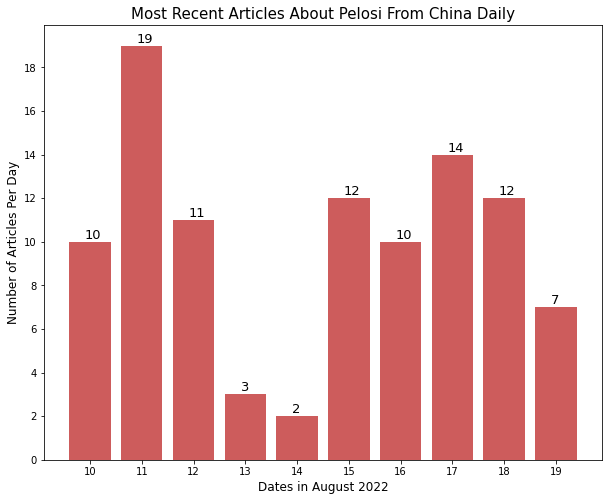

In [94]:
x_values = range(int(china_df['Day'].min()), int(china_df['Day'].max()) + 1)
y_values = num_articles_day

ax = plt.figure(figsize = (10, 8)).gca()
plt.bar(x_values, y_values, color = 'indianred')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
plt.xticks(x_values)

for i, v in enumerate(y_values):
    ax.text(i + 9.9, v + 0.15, str(v), size = 13)

plt.title("Most Recent Articles About Pelosi From China Daily", size = 15)
plt.xlabel("Dates in August 2022", size = 12)
plt.ylabel("Number of Articles Per Day", size = 12)

plt.savefig("recent_articles_pelosi_days.png")
plt.show()

In [95]:
num_articles_hour = []
num_articles_hour_time = []

for i in range(china_df['Hour'].min(), china_df['Hour'].max() + 1):
    globals()['hour_%s' % i] = len(china_df['Hour'][china_df['Hour'] == i])
    num_articles_hour.append(globals()['hour_%s' % i])
    num_articles_hour_time.append(i)

#print(hour_7)
print(num_articles_hour)

[18, 1, 0, 1, 0, 0, 6, 15, 6, 12, 7, 4, 1, 3, 1, 3, 5, 3, 2, 4, 3, 1, 3, 1]


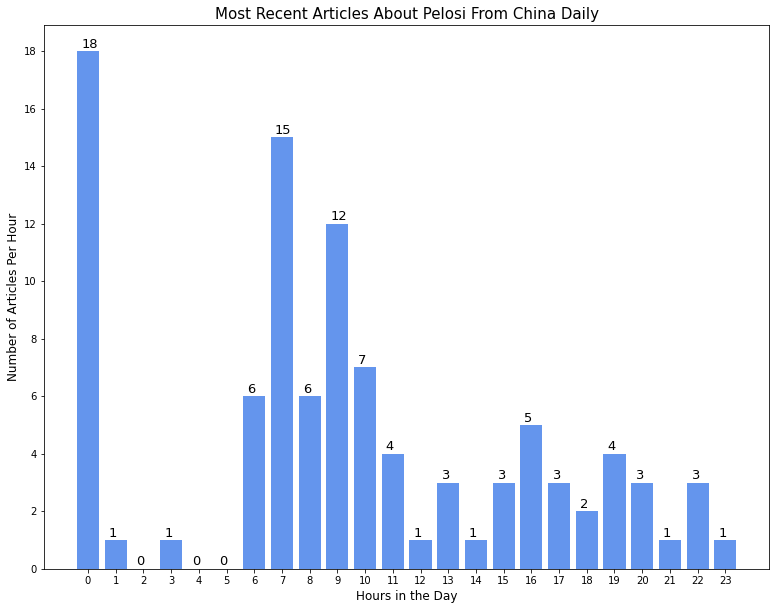

In [96]:
x_values = range(china_df['Hour'].min(), china_df['Hour'].max() + 1)
y_values = num_articles_hour

ax = plt.figure(figsize = (13, 10)).gca()
plt.bar(x_values, y_values, color = 'cornflowerblue')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
plt.xticks(x_values)

for i, v in enumerate(y_values):
    ax.text(i - 0.25, v + 0.12, str(v), size = 13)

plt.title("Most Recent Articles About Pelosi From China Daily", size = 15)
plt.xlabel("Hours in the Day", size = 12)
plt.ylabel("Number of Articles Per Hour", size = 12)

plt.savefig("recent_articles_pelosi_hours.png")
plt.show()

In [130]:
num_articles_hour_per_day = []


#this finds the day dates in china_df
for i in range(int(china_df['Day'].min()), int(china_df['Day'].max()) + 1):
    #goes through and creates a df per date
    globals()['day_%s' % days] = china_df[china_df['Day'] == str(i)]
    
    
    num_articles_hour = []
    
    for j in range(int(globals()['day_%s' % days]['Hour'].min()), int(globals()['day_%s' % days]['Hour'].max()) + 1):
        globals()['hour_%s' % hour] = len(globals()['day_%s' % days]['Hour'][globals()['day_%s' % days]['Hour'] == j])
        num_articles_hour.append(globals()['hour_%s' % hour])
       
    num_articles_hour_per_day.append(num_articles_hour)
    
    #print(num_articles_hour)
    #print(i) << dates 10 - 18
    
print(num_articles_hour_per_day)

[[1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1, 1], [4, 1, 0, 0, 0, 0, 0, 4, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3], [2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 1], [2], [1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1], [3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [2, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1], [4, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1]]


In [135]:
for i in range(int(china_df['Day'].min()), int(china_df['Day'].max()) + 1):
    #goes through and creates a df per date
    globals()['day_%s' % days] = china_df[china_df['Day'] == str(i)]
    
    
    
    for j in range(int(globals()['day_%s' % days]['Hour'].min()), int(globals()['day_%s' % days]['Hour'].max()) + 1):
        
        num_articles_hour_value = []
        for num in range(len(globals()['day_%s' % days]['Hour'])):
            globals()['hour_%s' % hour] = globals()['day_%s' % days]['Hour'].values[num]
            num_articles_hour_value.append(globals()['hour_%s' % hour])
        
        #print(num_articles_hour_value)

In [136]:
#for day in num_articles_hour_per_day:
    #print(day)
    #print(num_articles_hour_time)

In [133]:
for i in range(8):
    num_articles_hour_per_day[0].insert(0, 0)
    num_articles_hour_per_day[2].append(0)

for i in range(3):
    num_articles_hour_per_day[1].append(0)
    
for i in range(15):
    num_articles_hour_per_day[3].append(0)
    
for i in range(17):
    num_articles_hour_per_day[4].insert(0, 0)
    
for i in range(6):
    num_articles_hour_per_day[4].append(0)

for i in range(4):
    num_articles_hour_per_day[5].append(0)
    
for i in range(1):
    num_articles_hour_per_day[6].append(0)
    num_articles_hour_per_day[7].append(0)
    
for i in range(9):
    num_articles_hour_per_day[8].append(0)
    
for i in range(11):
    num_articles_hour_per_day[9].append(0)

    
print(num_articles_hour_per_day)

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1, 1], [4, 1, 0, 0, 0, 0, 0, 4, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0], [2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [2, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0], [4, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [49]:
num_articles_date = []

for i in range(int(china_df['Day'].min()), int(china_df['Day'].max()) + 1):
    num_articles_date.append(i)
    globals()['day_%s' % i] = len(china_df['Day'][china_df['Day'] == str(i)])
    num_articles_day.append(globals()['day_%s' % i])
    
#print(day_16)
print(num_articles_date)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


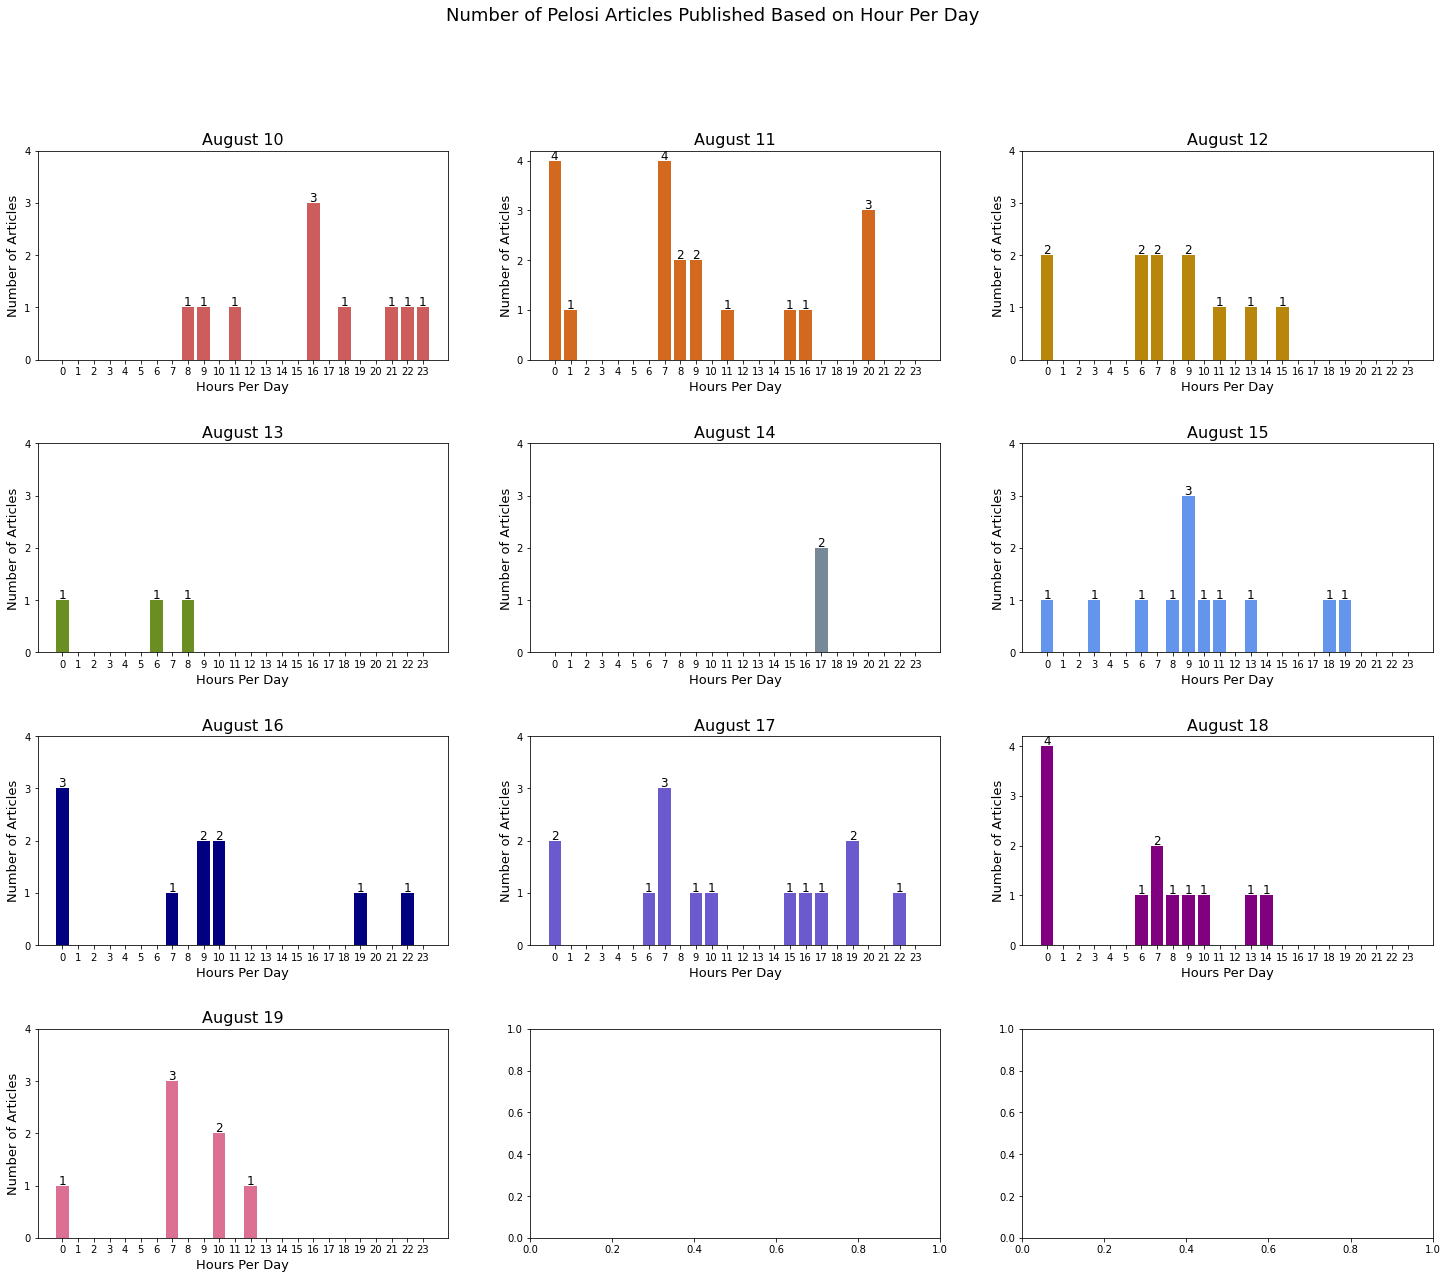

In [137]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (25, 20))
plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Number of Pelosi Articles Published Based on Hour Per Day", size = 18)

num = 0
colors = ['indianred', 'chocolate', 'darkgoldenrod', 'olivedrab', 'lightslategray', 'cornflowerblue', 'navy', 'slateblue', 'purple', 'palevioletred']
x = range(int(china_df['Hour'].max()) + 1)
for article_hours_day, article_date, color, ax in zip(num_articles_hour_per_day, num_articles_date, colors, axs.ravel()):
    ax.set_title("August " + str(article_date), size = 16)
    ax.set_xlabel("Hours Per Day", size = 13)
    ax.set_ylabel("Number of Articles", size = 13)
    
    ax.bar(range(24), article_hours_day, color = color)
    ax.set_xticks(range(24))
    ax.set_yticks(range(5))
    
    for i, v in enumerate(article_hours_day):
        if v != 0:
            ax.text(i - 0.25, v + 0.03, str(v), size = 12)

plt.savefig("recent_articles_pelosi_hour_per_day.png")
plt.show()


In [118]:
import newspaper
from newspaper import Article
from newspaper import fulltext

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import RegexpParser

from collections import Counter

### 3. Use the latest 20 articles and perform textual analysis to find the top ten most frequently used adjectives and make a visualization

In [311]:
article_links = china_df['Article Link']
#print(article_links.iloc[0])

for i in range(20):
    print(article_links.iloc[i])
    globals()['articlelink_%s' % i] = article_links.iloc[i]
    

#print("")
#print("4th link: " + str(articlelink_3))

https://www.chinadaily.com.cn/a/202208/19/WS62ff0e82a310fd2b29e73378.html
https://epaper.chinadaily.com.cn/a/202208/19/WS62fef53ba3109375516ee8c6.html
https://global.chinadaily.com.cn/a/202208/19/WS62fef4a0a310fd2b29e732e9.html
https://www.chinadaily.com.cn/a/202208/19/WS62fed223a310fd2b29e73192.html
https://www.chinadaily.com.cn/a/202208/19/WS62fece43a310fd2b29e73161.html
https://global.chinadaily.com.cn/a/202208/19/WS62fec681a310fd2b29e73124.html
https://epaper.chinadaily.com.cn/a/202208/19/WS62fee0b1a3109375516ee85b.html
https://www.chinadaily.com.cn/a/202208/18/WS62fde006a310fd2b29e72ff3.html
https://global.chinadaily.com.cn/a/202208/18/WS62fdd4ada310fd2b29e72fc2.html
https://global.chinadaily.com.cn/a/202208/18/WS62fda3dfa310fd2b29e72eff.html
https://global.chinadaily.com.cn/a/202208/18/WS62fd9467a310fd2b29e72de9.html
https://global.chinadaily.com.cn/a/202208/18/WS62fd86d8a310fd2b29e72d48.html
https://global.chinadaily.com.cn/a/202208/18/WS62fd7a95a310fd2b29e72d0b.html
https://www

In [303]:
for i in range(20):
    globals()['url_%s' % i] = globals()['articlelink_%s' % i]
    globals()['article_%s' % i] = Article(globals()['url_%s' % i])
    
    globals()['article_%s' % i].download()
    globals()['article_%s' % i].parse()
    
    globals()['articlelink_%s_text' % i] = globals()['article_%s' % i].text
                    
    
#print(articlelink_3_text)

In [306]:
for i in range(20):
    globals()['cleanedtext_%s' % i] = re.sub('\W+', ' ', globals()['articlelink_%s_text' % i])
    globals()['tokenized_%s' % i] = word_tokenize(globals()['cleanedtext_%s' % i])
    globals()['pos_tagged_%s' % i] = pos_tag(globals()['tokenized_%s' % i])
    
    globals()['articlelink_%s_adjectives' % i] = []
    for pos in globals()['pos_tagged_%s' % i]:
        if pos[1] == 'JJ':
            if pos[0] != 's':
                if pos[0] != 't':
                    globals()['articlelink_%s_adjectives' % i].append(pos[0])

#print(articlelink_3_adjectives)

In [308]:
for i in range(20):
    globals()['counts_%s' % i] = Counter(globals()['articlelink_%s_adjectives' % i])
    globals()['most_common_%s' % i] = globals()['counts_%s' % i].most_common(10)
    
#print(most_common_3)

In [314]:
words = []
frequencies = []

for i in range(20):
    globals()['word_%s' % i] = []
    globals()['frequency_%s' % i] = []
    
    for m in globals()['most_common_%s' % i]:
        globals()['word_%s' % i].append(m[0])
        globals()['frequency_%s' % i].append(m[1])
    
    words.append(globals()['word_%s' % i])
    frequencies.append(globals()['frequency_%s' % i])
    
#print(word_3)
#print(frequency_3)

#print(words)
#print(frequencies)

In [316]:
count = []
for c in range(1, 21):
    #print(c)
    count.append(c)

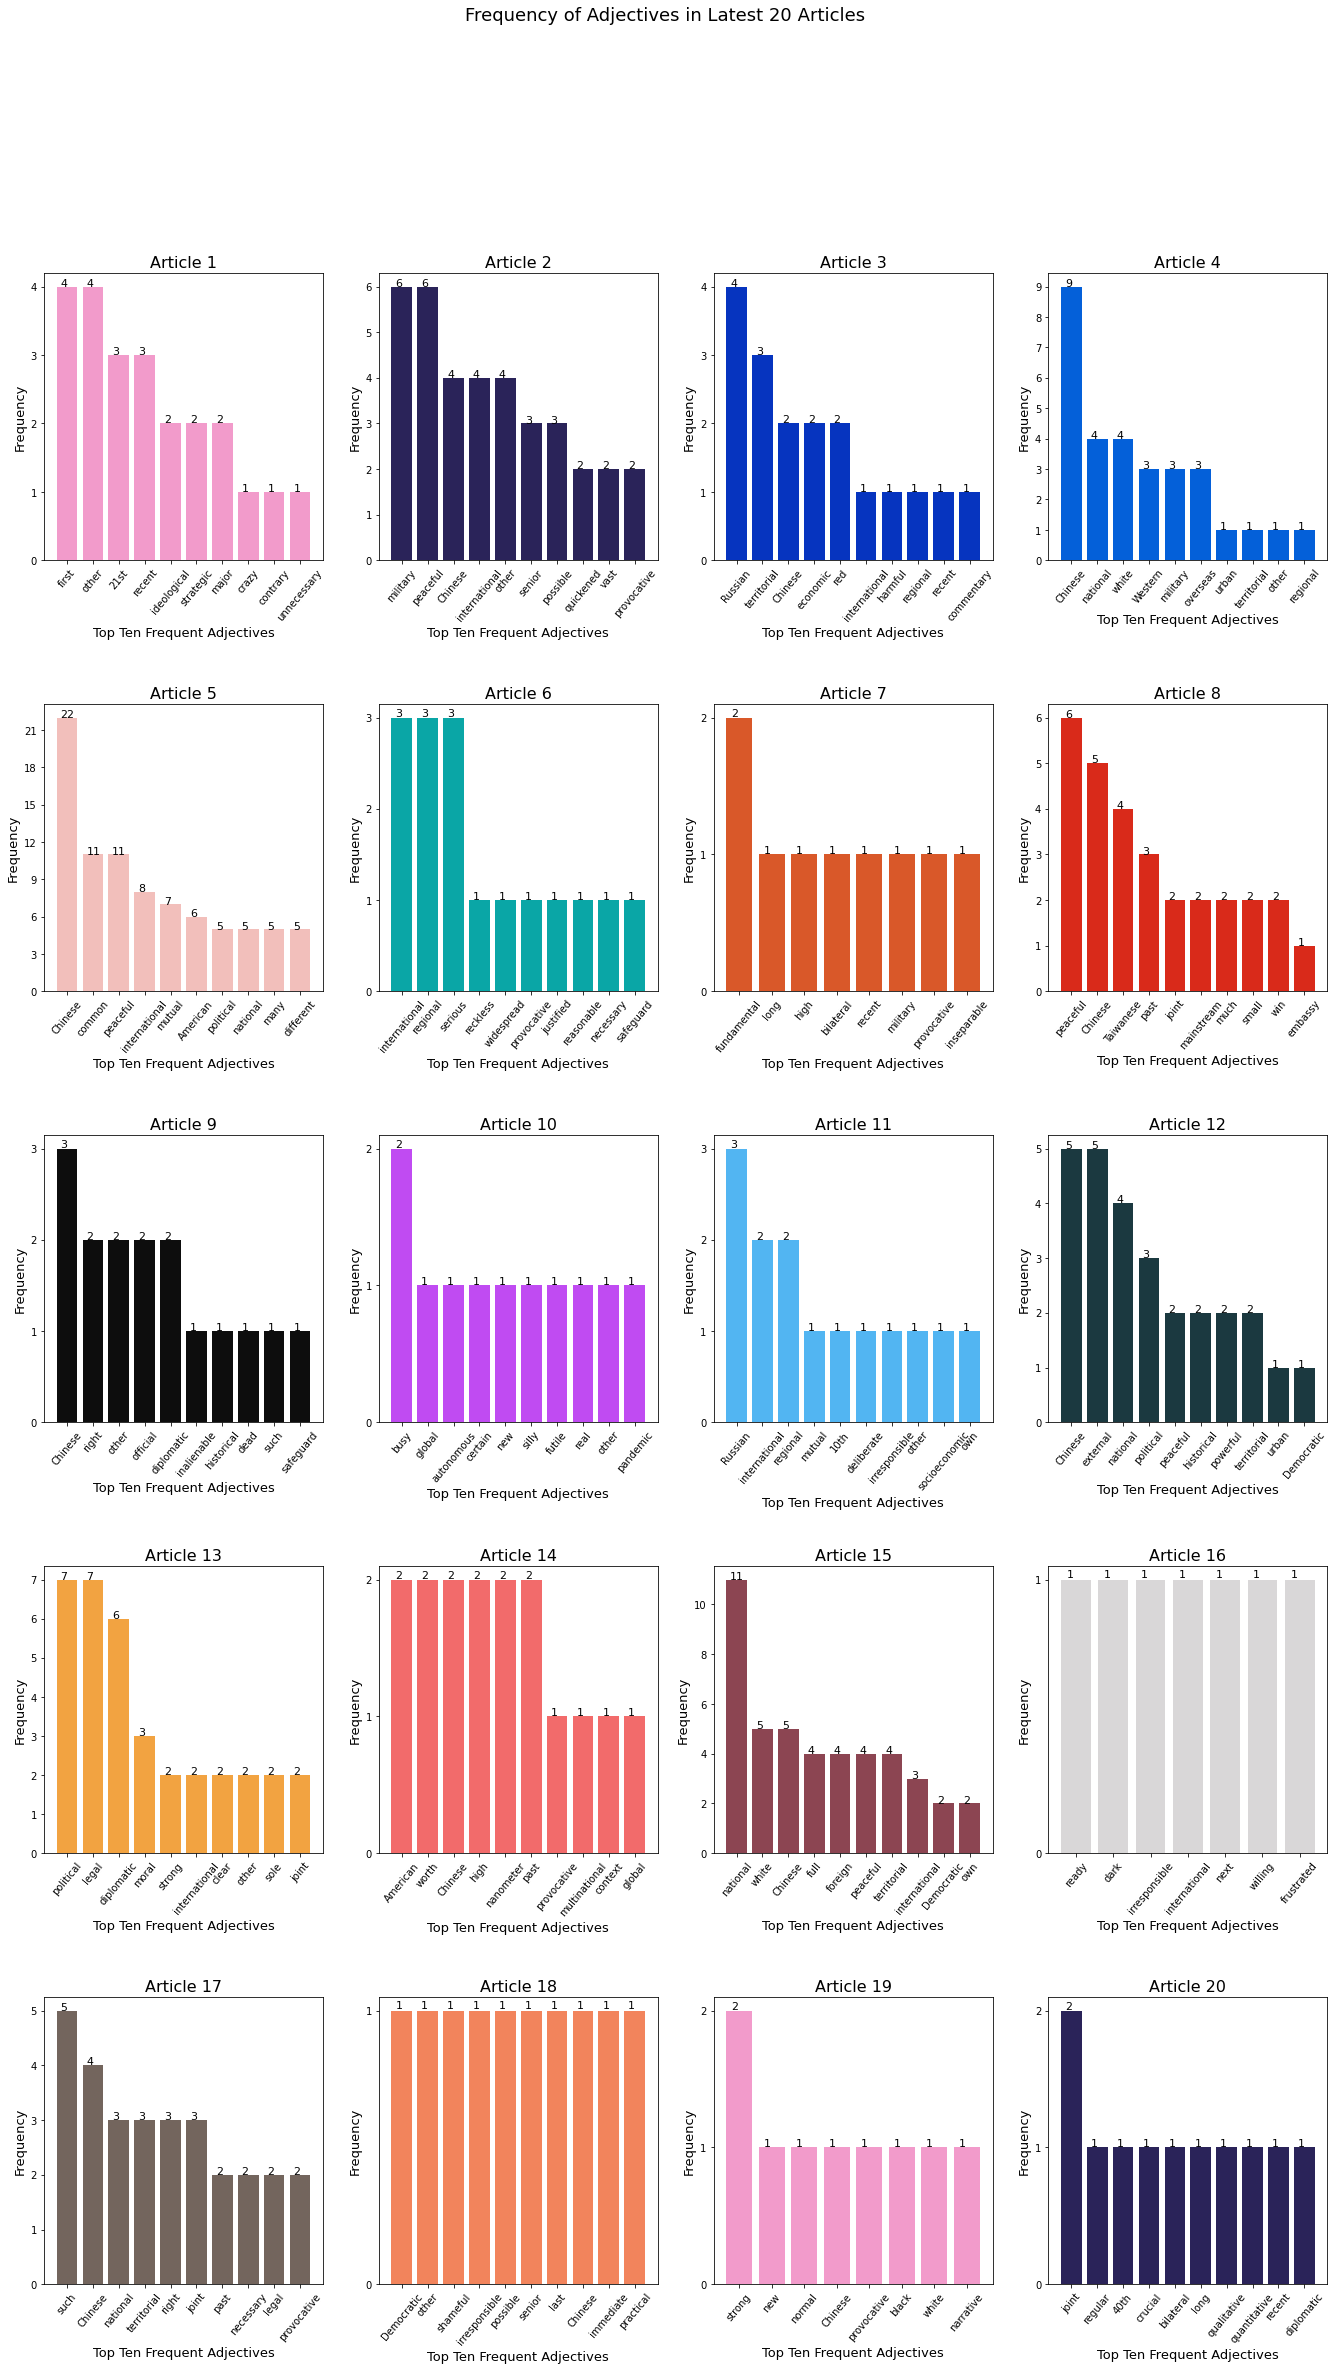

In [357]:
fig, axs = plt.subplots(nrows = 5, ncols = 4, figsize = (23, 37))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
fig.suptitle("Frequency of Adjectives in Latest 20 Articles", size = 18)

colors = ['#F29BCB', '#2A2359', '#0634BF', '#0460D9', '#F2BFBB', '#0AA6A6', '#D95829', '#D92A1A', '#0D0D0D', '#C04BF2', '#52B5F2', '#1B3940', 
          '#F2A341', '#F26B6B', '#8C4552', '#D9D7D8', '#73655D', '#F2845C', '#F29BCB', '#2A2359']
for w, f, c, color, ax in zip(words, frequencies, count, colors, axs.ravel()):
    ax.set_title("Article " + str(c), size = 16)
    ax.set_xlabel("Top Ten Frequent Adjectives", size = 13)
    ax.set_ylabel("Frequency", size = 13)
    
    ax.bar(w, f, color = color)
    ax.tick_params(axis = 'x', labelrotation = 50)
    ax.yaxis.set_major_locator(MaxNLocator(integer = True))
    
    for i, v in enumerate(f):
        if v != 0:
            ax.text(i - 0.25, v + 0.01, str(v), size = 11)

plt.savefig("top_10_adjectives_in_latest_20_articles")
plt.show()

In [300]:
#practice with one link

#url = articlelink_0
#article = Article(url)

#article.download()
#article.parse()
#articlelink_0_text = article.text

#print(articlelink_0_text)


#cleaned_text = re.sub('\W+', ' ', articlelink_0_text)
#print(cleaned_text)
#tokenized = word_tokenize(cleaned_text)
#print(tokenized)
#pos_tagged_sentence = pos_tag(tokenized)
#print(pos_tagged_sentence)


#articlelink_0_adjectives = []
#for pos in pos_tagged_sentence:
    #if pos[1] == 'JJ':
        #if pos[0] != 's':
            #if pos[0] != 't':
                #print(pos[0])
                #articlelink_0_adjectives.append(pos[0])
                
#print(articlelink_0_adjectives)


#counts = Counter(articlelink_0_adjectives)
#most_common = counts.most_common(10)
#print(counts.most_common(10))

#word = []
#frequency = []
#for i in most_common:
    #print(i)
    #word.append(i[0])
    #frequency.append(i[1])
    
    
    
#plt.bar(word, frequency)

#plt.xticks(rotation = 50)
#plt.show()

### 4. Use the latest 10 articles to find the occupation and region of the people quoted in the articles

In [3]:
#print(articlelink_0_text)

names = ["John K. Fairbank", "Joe Biden"]

In [4]:
#print(articlelink_1_text)

names_1 = ["Kurt M. Campbell", "Graham Allison"]
names.extend(names_1)

In [5]:
#print(articlelink_2_text)

names_2 = ["Dmitry Peskov", "Vladimir Putin", "Andrey Denisov", "Igor Denisov", "Glenn Diesen", "Vladimir Vinokurov"]
names.extend(names_2)

In [6]:
#print(articlelink_3_text)

names_3 = ["Ping Tan", "David Choi", "Dai Guofen"]
names.extend(names_3)

In [7]:
#print(articlelink_4_text)

names_4 = ["Steve Clemons", "Qin Gang"]
names.extend(names_4)

In [8]:
#print(articlelink_5_text)

names_5 = []
names.extend(names_5)

In [9]:
#print(articlelink_6_text)

names_6 = ["Yang Jiechi"]
names.extend(names_6)

In [10]:
#print(articlelink_7_text)

names_7 = ["Josh Rogin", "Qin Gang"]
names.extend(names_7)

In [11]:
#print(articlelink_8_text)

names_8 = ["Zheng Zeguang"]
names.extend(names_8)

In [12]:
#print(articlelink_9_text)

names_9 = []
names.extend(names_9)

In [13]:
#print(names)

#removes the duplicates
names = list(dict.fromkeys(names))
print(names)

#print(names[0])

['John K. Fairbank', 'Joe Biden', 'Kurt M. Campbell', 'Graham Allison', 'Dmitry Peskov', 'Vladimir Putin', 'Andrey Denisov', 'Igor Denisov', 'Glenn Diesen', 'Vladimir Vinokurov', 'Ping Tan', 'David Choi', 'Dai Guofen', 'Steve Clemons', 'Qin Gang', 'Yang Jiechi', 'Josh Rogin', 'Zheng Zeguang']


In [275]:
#put names into Dataframe with occupation, location (& latitude and longitude), and if it was pulled from China Daily or New York Times

data = {'Name': [x for x in names], 
        'Occupation': ['American Historian of China and United States Relations', 'Current (46th) President of the United States', 
                                        'American Diplomat: 1st National Security Council Soordinator for the Indo-Pacific', 
                                        'American Political Scientist, Director of the Belfer Center for Science and International Affairs', 
                                        'Russian Diplomat, Kremlin Press Secretary', 'Current President of Russia', 
                                        'Russian Diplomat: Ambassador to China', 'Senior Research Fellow: Moscow State Institute of International Relations', 
                                        'Norwegian Political Scientist', 'Russian Professor: Diplomatic Academy at the Russian Foreign Ministry', 
                                        "Canadian Lawyer, Chairman for Chinese Canadians for China's Reunification", 
                                        'National Executive Chair of the National Congress of Chinese Canadians (CCCR)', 
                                        "Taiwan Businessman, Honorary Chairman of the Chinese Canadians for China's Reunification (CCCR)", 
                                        'American Journalist and Blogger', 'Chinese Diplomat: Ambassador to the United States', 
                                        'Chinese Diplomat: Member of Politburo of the Chinese Communist Party (CCP)', 'American Journalist', 
                                        'Chinese Diplomat: Ambassador to the United Kingdom'], 
       'Location': ['Cambridge, Massachusetts, United States of America', 
                    'Washington, D.C., United States of America', 
                    'Washington, D.C., United States of America', 
                    'Arlington, Virginia, United States of America', 
                    'Moscow, Russia', 
                    'Moscow, Russia', 
                    'Beijing, China', 
                    'Moscow, Russia', 
                    'Norway', 
                    'Moscow, Russia', 
                    'Canada',
                    'Vancouver, British Columbia, Canada', 
                    'Canada', 
                    'Washington, D.C., United States of America', 
                    'Washington, D.C., United States of America', 
                    'Beijing, China', 
                    'Washington, D.C., United States of America', 
                    'London, United Kingdom'],
       'Latitude': [42.365250, 38.897675, 38.907192, 38.854462, 55.750470504212494, 55.7514952, 39.94424566968812, 55.6725951, 60.5000209, 
                    55.73551386691384, 50.71347851565299, 49.2608724, 50.55087719271737, 38.89494112016923, 38.94274328084182, 39.906217, 38.8947995138239, 51.5210465],
       'Longitude': [-71.105011, -77.036530, -77.036873, -77.059721, 37.6181531, 37.6181531, 116.42360276629049, 37.4857089, 9.0999715, 
                     37.595314500364324, -108.92934455247374, -123.113952, -110.24770392747374, -77.0365427, -77.06646394729614, 116.3912757, -77.0365427, 
                     -0.1460189],
       'China Daily': ['yes' for i in range(len(names))]}


In [276]:
data_df = pd.DataFrame(data)
data_df.head()

,Name,Occupation,Location,Latitude,Longitude,China Daily
0,John K. Fairbank,American Historian of China and United States ...,"Cambridge, Massachusetts, United States of Ame...",42.365250,-71.105011,yes
1,Joe Biden,Current (46th) President of the United States,"Washington, D.C., United States of America",38.897675,-77.036530,yes
2,Kurt M. Campbell,American Diplomat: 1st National Security Counc...,"Washington, D.C., United States of America",38.907192,-77.036873,yes
3,Graham Allison,"American Political Scientist, Director of the ...","Arlington, Virginia, United States of America",38.854462,-77.059721,yes
4,Dmitry Peskov,"Russian Diplomat, Kremlin Press Secretary","Moscow, Russia",55.750471,37.618153,yes


### 5. Extract the latest 10 news articles containing the keyword "Pelosi" from New York Times, and find the occupation and region of the people quoted in the articles

In [111]:
pelosi_articles_nytimes = []
pelosi_articles_nytimes_link = []

url = 'https://www.nytimes.com/'
u = urlparse(url)

new_url = u.geturl()
driver.delete_all_cookies()
driver.get(new_url)

search = driver.find_element(By.CSS_SELECTOR , "div.css-10488qs > button")
search.click()

search_bar = driver.find_element(By.CSS_SELECTOR, 'div.css-1j9evst > input')
search_bar.send_keys("Pelosi")
search_bar.send_keys(Keys.ENTER)
time.sleep(5)

dropdown = Select(driver.find_element(By.CSS_SELECTOR, 'div.css-1e67xgz > select'))
dropdown.select_by_value('newest')



        
for number in range(1):
    soup = BeautifulSoup(driver.page_source, 'html.parser')
            
    #prints the article title
    for article in soup.select(".css-1l4w6pd > div > div > div > a > h4"):
        #print(article.text)
        pelosi_articles_nytimes.append(article.text)
        
    for link in soup.select(".css-1l4w6pd > div > div > div > a"):
        u = urlparse(link.get('href'))
        new_u = u._replace(scheme = 'http://www.nytimes.com')
        new_url = new_u.geturl()
        #print(new_url)
        pelosi_articles_nytimes_link.append(new_url)
        
    time.sleep(3)


In [128]:
nytimes_df = pd.DataFrame({"Articles": pelosi_articles_nytimes, "Article Link": pelosi_articles_nytimes_link})
nytimes_df.head()

,Articles,Article Link
0,Chinese military drills circling Taiwan set up...,http://www.nytimes.com:/2022/08/03/world/asia/...
1,Pelosi’s Husband Pleads Guilty to D.U.I. After...,http://www.nytimes.com:/2022/08/23/us/politics...
2,After Nancy Pelosi: A San Francisco Race ‘That...,http://www.nytimes.com:/2022/08/13/us/politics...
3,Why Pelosi’s Visit to Taiwan Is Utterly Reckless,http://www.nytimes.com:/2022/08/01/opinion/nan...
4,Taking Stock of Pelosi’s Taiwan Trip,http://www.nytimes.com:/2022/08/03/business/de...


In [135]:
nytimes_articlelink = nytimes_df['Article Link']
nytimes_articlelink_0 = nytimes_articlelink.iloc[0]
#print(nytimes_articlelink_0)

url = nytimes_articlelink_0
article = Article(url)

article.download()
article.parse()

In [137]:
for i in range(10):
    print(nytimes_articlelink.iloc[i])
    globals()['nytimes_articlelink_%s' % i] = nytimes_articlelink.iloc[i]

http://www.nytimes.com:/2022/08/03/world/asia/chinese-military-drills-maps.html?searchResultPosition=1
http://www.nytimes.com:/2022/08/23/us/politics/paul-pelosi-dui-guilty.html?searchResultPosition=2
http://www.nytimes.com:/2022/08/13/us/politics/pelosi-house-race-san-francisco.html?searchResultPosition=3
http://www.nytimes.com:/2022/08/01/opinion/nancy-pelosi-taiwan-china.html?searchResultPosition=4
http://www.nytimes.com:/2022/08/03/business/dealbook/pelosi-taiwan-business.html?searchResultPosition=5
http://www.nytimes.com:/2022/08/05/opinion/taiwan-china-pelosi-democracy.html?searchResultPosition=6
http://www.nytimes.com:/2022/08/03/world/asia/pelosi-taiwan-china.html?searchResultPosition=7
http://www.nytimes.com:/2022/08/02/opinion/pelosi-taiwan-china.html?searchResultPosition=8
http://www.nytimes.com:/2022/08/02/us/politics/nancy-pelosi-taiwan-beijing.html?searchResultPosition=9
http://www.nytimes.com:/2022/08/02/us/politics/pelosi-taiwan-china-record.html?searchResultPosition=10

In [171]:
for i in range(10):
    globals()['ny_url_%s' % i] = globals()['nytimes_articlelink_%s' % i]
    globals()['ny_article_%s' % i] = Article(globals()['ny_url_%s' % i])
    
    globals()['ny_article_%s' % i].download()
    globals()['ny_article_%s' % i].parse()
    
    globals()['nytimes_articlelink_%s_text' % i] = globals()['ny_article_%s' % i].text
    
#print(nytimes_articlelink_1_text)

In [172]:
#print(nytimes_articlelink_0_text)

ny_names = ['Xi Jinping']

In [173]:
#print(nytimes_articlelink_1_text)

ny_names_1 = []
ny_names.extend(ny_names_1)

In [174]:
#print(nytimes_articlelink_2_text)

ny_names_2 = ['Nancy Pelosi']
ny_names.extend(ny_names_2)

In [175]:
#print(nytimes_articlelink_3_text)

ny_names_3 = []
ny_names.extend(ny_names_3)

In [176]:
#print(nytimes_articlelink_4_text)

ny_names_4 = ['Ana Swanson', 'Gina Raimondo', 'Brian Deese']
ny_names.extend(ny_names_4)

In [177]:
#print(nytimes_articlelink_5_text)

ny_names_5 = []
ny_names.extend(ny_names_5)

In [178]:
#print(nytimes_articlelink_6_text)

ny_names_6 = ['Hua Chunying']
ny_names.extend(ny_names_6)

In [179]:
#print(nytimes_articlelink_7_text)

ny_names_7 = ['Newt Gingrich']
ny_names.extend(ny_names_7)

In [180]:
#print(nytimes_articlelink_8_text)

ny_names_8 = ['Joe Biden']
ny_names.extend(ny_names_8)

In [181]:
#print(nytimes_articlelink_9_text)

ny_names_9 = ['Nancy Pelosi']
ny_names.extend(ny_names_9)

In [182]:
ny_names = list(dict.fromkeys(ny_names))
print(ny_names)

['Xi Jinping', 'Nancy Pelosi', 'Ana Swanson', 'Gina Raimondo', 'Brian Deese', 'Hua Chunying', 'Newt Gingrich', 'Joe Biden']


In [184]:
ny_names.pop(-1)
print(ny_names)

['Xi Jinping', 'Nancy Pelosi', 'Ana Swanson', 'Gina Raimondo', 'Brian Deese', 'Hua Chunying', 'Newt Gingrich']


In [229]:
data_ny = {'Name': [x for x in ny_names], 
        'Occupation': ["Current (7th) President of the People's Republic of China, General Secretary of the Chinese Communist Party, Chairman of the Central Military Commission", 
                       'American Politician: 52nd Speaker of the United States House of Representatives', 
                       'American Journalist: New York Times', 'American Politician: United States Secretary of Commerce', 
                       'American Economic and Political Advisor, Director of National Economic Council', 'Assistant Minister and Spokesperson of Foreign Affairs',
                      'American Politician: 50th Speaker of the United States House of Representatives'], 
       'Location': ['Beijing, China', 'San Diego, California, United States of America', 'New York, New York, United States of America', 
                    'Washington, D.C., United States of America', 'Washington, D.C., United States of America', 'Beijing, China', 
                    'Atlanta, Georgia, United States of America'],
       'Latitude': [39.906217, 32.7174202, 40.7127281, 38.8950368, 38.89485031101822, 39.907772344793074, 33.7489924],
       'Longitude': [116.3912757, -117.1627728, -74.0060152, -77.0365427, -77.0365427, 116.3912757, -84.3902644],
       'New York Times': ['yes' for i in range(len(ny_names))]}


In [230]:
data_ny_df = pd.DataFrame(data_ny)
data_ny_df.head()

,Name,Occupation,Location,Latitude,Longitude,New York Times
0,Xi Jinping,Current (7th) President of the People's Republ...,"Beijing, China",39.906217,116.391276,yes
1,Nancy Pelosi,American Politician: 52nd Speaker of the Unite...,"San Diego, California, United States of America",32.717420,-117.162773,yes
2,Ana Swanson,American Journalist: New York Times,"New York, New York, United States of America",40.712728,-74.006015,yes
3,Gina Raimondo,American Politician: United States Secretary o...,"Washington, D.C., United States of America",38.895037,-77.036543,yes
4,Brian Deese,"American Economic and Political Advisor, Direc...","Washington, D.C., United States of America",38.894850,-77.036543,yes


In [277]:
new_df = pd.concat([data_df, data_ny_df]).reset_index(drop = True)
new_df.head()

,Name,Occupation,Location,Latitude,Longitude,China Daily,New York Times
0,John K. Fairbank,American Historian of China and United States ...,"Cambridge, Massachusetts, United States of Ame...",42.365250,-71.105011,yes,NaN
1,Joe Biden,Current (46th) President of the United States,"Washington, D.C., United States of America",38.897675,-77.036530,yes,NaN
2,Kurt M. Campbell,American Diplomat: 1st National Security Counc...,"Washington, D.C., United States of America",38.907192,-77.036873,yes,NaN
3,Graham Allison,"American Political Scientist, Director of the ...","Arlington, Virginia, United States of America",38.854462,-77.059721,yes,NaN
4,Dmitry Peskov,"Russian Diplomat, Kremlin Press Secretary","Moscow, Russia",55.750471,37.618153,yes,NaN


In [278]:
new_df.at[1, 'New York Times'] = 'yes'
new_df['China Daily'] = new_df['China Daily'].fillna('no')
new_df['New York Times'] = new_df['New York Times'].fillna('no')
new_df.head(20)

,Name,Occupation,Location,Latitude,Longitude,China Daily,New York Times
0,John K. Fairbank,American Historian of China and United States ...,"Cambridge, Massachusetts, United States of Ame...",42.365250,-71.105011,yes,no
1,Joe Biden,Current (46th) President of the United States,"Washington, D.C., United States of America",38.897675,-77.036530,yes,yes
2,Kurt M. Campbell,American Diplomat: 1st National Security Counc...,"Washington, D.C., United States of America",38.907192,-77.036873,yes,no
3,Graham Allison,"American Political Scientist, Director of the ...","Arlington, Virginia, United States of America",38.854462,-77.059721,yes,no
4,Dmitry Peskov,"Russian Diplomat, Kremlin Press Secretary","Moscow, Russia",55.750471,37.618153,yes,no
5,Vladimir Putin,Current President of Russia,"Moscow, Russia",55.751495,37.618153,yes,no
6,Andrey Denisov,Russian Diplomat: Ambassador to China,"Beijing, China",39.944246,116.423603,yes,no
7,Igor Denisov,Senior Research Fellow: Moscow State Institute...,"Moscow, Russia",55.672595,37.485709,yes,no
8,Glenn Diesen,Norwegian Political Scientist,Norway,60.500021,9.099972,yes,no
9,Vladimir Vinokurov,Russian Professor: Diplomatic Academy at the R...,"Moscow, Russia",55.735514,37.595315,yes,no


### 6. Make a visualization with steps 4 and 5 comparing the differences between the sources cited in China Daily and New York Time stories

In [247]:
import folium

In [256]:
def select_marker_color(row):
    if row['China Daily'] == 'yes' and row['New York Times'] == 'no':
        return 'red'
    elif row['New York Times'] == 'yes' and row['China Daily'] == 'no':
        return 'blue'
    elif row['China Daily'] == 'yes' and row['New York Times'] == 'yes':
        return 'purple'

In [279]:
new_df['Marker Color'] = new_df.apply(select_marker_color, axis = 1)
new_df.head()

,Name,Occupation,Location,Latitude,Longitude,China Daily,New York Times,Marker Color
0,John K. Fairbank,American Historian of China and United States ...,"Cambridge, Massachusetts, United States of Ame...",42.365250,-71.105011,yes,no,red
1,Joe Biden,Current (46th) President of the United States,"Washington, D.C., United States of America",38.897675,-77.036530,yes,yes,purple
2,Kurt M. Campbell,American Diplomat: 1st National Security Counc...,"Washington, D.C., United States of America",38.907192,-77.036873,yes,no,red
3,Graham Allison,"American Political Scientist, Director of the ...","Arlington, Virginia, United States of America",38.854462,-77.059721,yes,no,red
4,Dmitry Peskov,"Russian Diplomat, Kremlin Press Secretary","Moscow, Russia",55.750471,37.618153,yes,no,red


In [280]:
my_map = folium.Map(
    location = [39.122169909173465, -41.12464512204621],
    zoom_start = 2
)

for _, row in new_df.iterrows():
    html = f"""
            <h2>{row['Name']}</h2>
            <h4>{row['Occupation']}</h4>
        """
    iframe = folium.IFrame(html = html, width = 250, height = 150)
    popup = folium.Popup(iframe)
    
    folium.Marker(
        location = [row['Latitude'], row['Longitude']],
        popup = popup,
        tooltip = row['Location'],
        icon = folium.Icon(color = row['Marker Color'], prefix = 'fa', icon = 'circle')
        
    ).add_to(my_map)

my_map